In [2]:
import pennylane as qml
from math import asin, sqrt

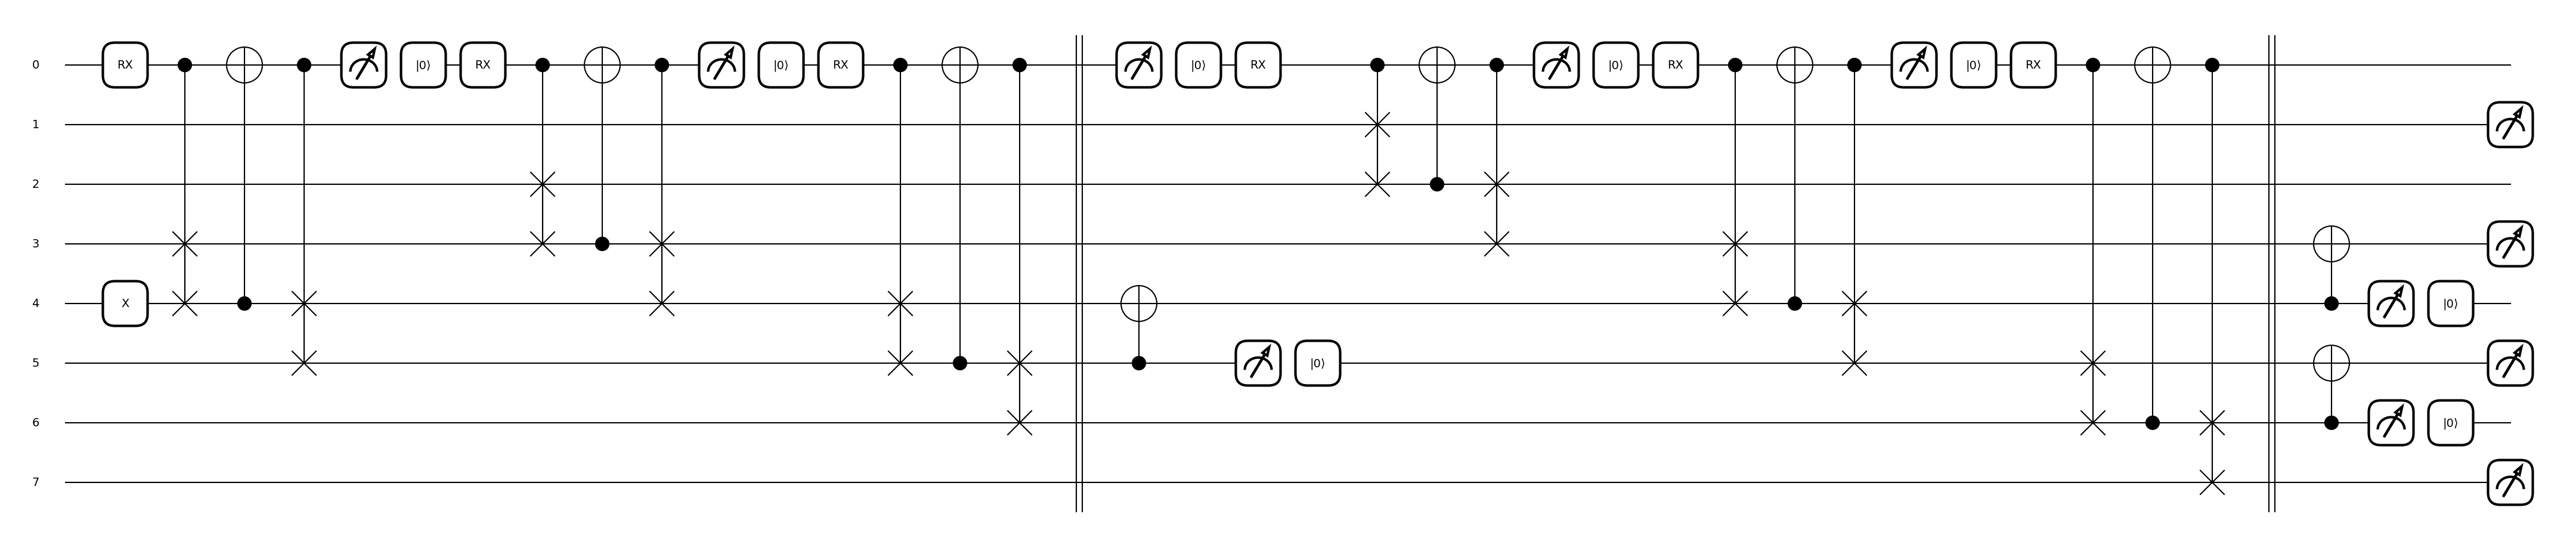

In [3]:
n = 4
dev = qml.device("default.qubit", wires=2*n, shots=10000)

phi = 2*asin(sqrt(0.2))

@qml.qnode(dev)
def circuit():
    # First row
    qml.RX(phi, wires=0)
    qml.PauliX(wires=4)
    qml.CSWAP(wires=[0,4,3])
    qml.CNOT(wires=[4,0])
    qml.CSWAP(wires=[0,5,4])
    
    # Reset control wire
    qml.measure(wires=0, reset=True)

    # Second row
    qml.RX(phi, wires=0)
    qml.CSWAP(wires=[0, 3, 2])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 4, 3])
    
    qml.measure(wires=0, reset=True)
    qml.RX(phi, wires=0)
    
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[5, 0])
    qml.CSWAP(wires=[0, 5, 6])

    qml.Barrier()
    qml.CNOT(wires=[5, 4])
    qml.measure(wires=5, reset=True)

    # Third row
    qml.measure(wires=0, reset=True)
    qml.RX(phi, wires=0)
    qml.CSWAP(wires=[0, 2, 1])
    qml.CNOT(wires=[2, 0])
    qml.CSWAP(wires=[0, 3, 2])

    qml.measure(wires=0, reset=True)
    qml.RX(phi, wires=0)

    qml.CSWAP(wires=[0, 4, 3])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 5, 4])

    qml.measure(wires=0, reset=True)
    qml.RX(phi, wires=0)
    
    qml.CSWAP(wires=[0, 6, 5])
    qml.CNOT(wires=[6, 0])
    qml.CSWAP(wires=[0, 7, 6])

    qml.Barrier()
    qml.CNOT(wires=[4, 3])
    qml.measure(wires=4, reset=True)

    qml.CNOT(wires=[6, 5])
    qml.measure(wires=6, reset=True)
    
    return qml.probs(wires=[1,3,5, 7])

qml.draw_mpl(circuit)(); #draws circuit

In [4]:
circuit()

ValueError: p < 0, p > 1 or p is NaN